# Espaço de Fase para alguns sistemas

In [1]:
# bibliotecas gerais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# config matplotlib
sns.set_style("ticks")
plt.rcParams['savefig.dpi'] = 200
plt.rcParams["figure.dpi"] = 150

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

## Pêndulo simples

### Cálculo

In [2]:
g,L = 1,1
xvalues, yvalues = np.meshgrid(np.arange(-8, 8, 0.1), np.arange(-3, 3, 0.1))
xdot = yvalues
ydot = -g/L*np.sin(xvalues)

### Gráfico

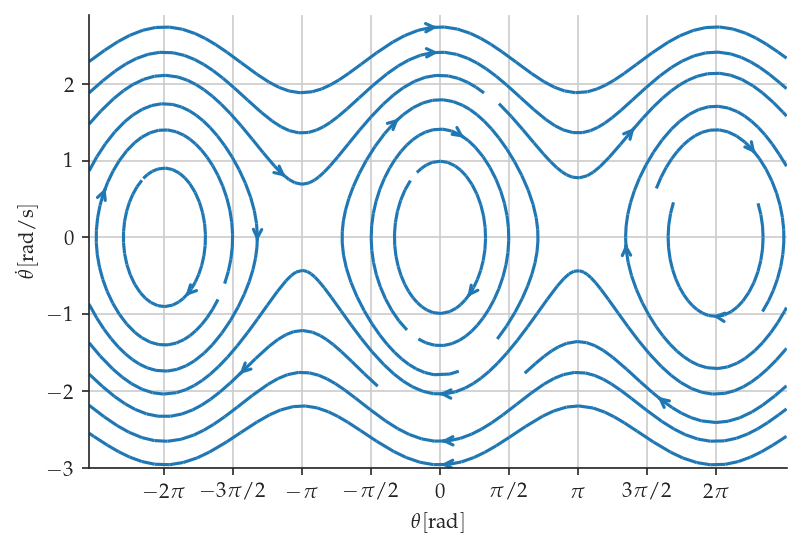

In [4]:
fig, ax = plt.subplots()
ax.streamplot(xvalues, yvalues, xdot, ydot, arrowstyle='->', minlength=0.5)

ax.set_xlabel(r"$\theta [\textrm{rad}]$")
ax.set_ylabel(r"$\dot{\theta} [\textrm{rad/s}]$")

ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi, -np.pi/2, -np.pi, -3*np.pi/2, -2*np.pi])
ax.set_xticklabels(['$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$', r'$-\pi/2$', r'$-\pi$', r'$-3\pi/2$', r'$-2\pi$'])

ax.grid()
sns.despine()
fig.savefig("../../reports/relatorio-ee015/figures/pendulum-phase-space.pdf")

## RLC Série

### Cálculo

In [3]:
def simular_rlc(n_iteracoes, v0, i0):
    V = [v0]
    I = [i0]
    R = 1
    C = 500
    L = 1000
    for i in range(0, n_iteracoes):
        v = V[i]
        i = I[i]
        dv_dt = i/C
        v = v + dv_dt        
        di_dt = (-1/L)*(R*i + v)
        i = i + di_dt
        V.append(v)
        I.append(i)
    return V, I

In [4]:
V, I = simular_rlc(10000, 1, 1)

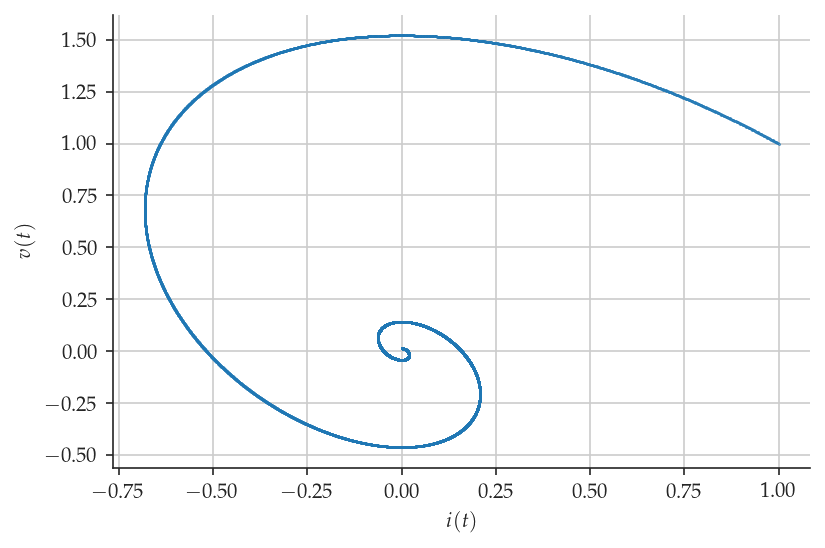

In [5]:
fig, ax = plt.subplots()

ax.scatter(I, V, s=0.1)

ax.set_ylabel(r"$v(t)$")
ax.set_xlabel(r"$i(t)$")

ax.grid()
sns.despine()
fig.savefig("../../reports/relatorio-ee015/figures/rlc-phase-space.png")